# Recommendation Systems

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import joblib
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os
from contextlib import contextmanager




In [2]:
data = pd.read_csv('ratings_Electronics.csv', sep=',', error_bad_lines=False, encoding="latin-1")
data.columns = ['userID', 'productId', 'ratings','timestamp']
#userId, productId, and ratings and the fourth column is timestamp

In [3]:
data.sample(10)

,userID,productId,ratings,timestamp
6564800,A9C75BM45B09E,B009A7DA42,1.0,1355529600
782260,A3QE8WEICGDKHW,B000BUDHNQ,5.0,1404259200
705067,A2NYYFRWBR0U5E,B000A6NV0U,2.0,1320278400
1541118,A2SHWX9CUUI5ON,B000Z99ZCA,4.0,1365206400
5988515,A27NEERI5A3XGI,B007ZIBURC,5.0,1382227200
3268363,A1ECVNCNWGITLC,B003DZ165W,5.0,1287705600
7398535,A155UC63PN20ZG,B00DIGVY8A,5.0,1391385600
2559694,A140K7PPZP700X,B002DW92IE,3.0,1354406400
4975010,A9GC6AECLGCM4,B005HMUAY2,5.0,1365120000
1407622,A9EO0JNG022TL,B000UW3DH0,4.0,1362355200


In [4]:
data.shape

(7824481, 4)

In [5]:
data.drop(columns='timestamp',inplace=True)

In [6]:
data.shape

(7824481, 3)

In [7]:
data.head(10)

,userID,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
5,A3J3BRHTDRFJ2G,0511189877,2.0
6,A2TY0BTJOTENPG,0511189877,5.0
7,A34ATBPOK6HCHY,0511189877,5.0
8,A89DO69P0XZ27,0511189877,5.0
9,AZYNQZ94U6VDB,0511189877,5.0


In [8]:
User_Data = data.groupby('userID')
User_Data.first()

,productId,ratings
userID,,
A00000262KYZUE4J55XGL,B003UYU16G,5.0
A000063614T1OE0BUSKUT,B00419ZT3E,5.0
A00009182QVLSWIGHLS1B,B009SXR7WE,5.0
A00009661LC9LQPGKJ24G,B004GWQBWY,5.0
A00010809P09NUU6ZP6H,B002SSM5AU,5.0
...,...,...
AZZZOVIBXHGDR,B0002BEXNM,1.0
AZZZRS1YZ8HVP,B001CJOLBW,4.0
AZZZSIK7NFFVP,B009FU8BR0,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E00306160>]],
      dtype=object)

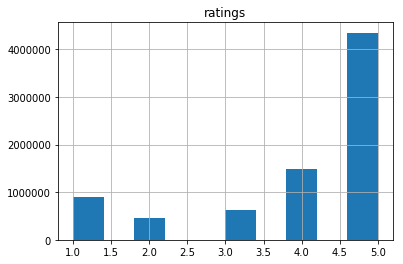

In [10]:
#There are 4201696 users in the dataset
data.hist(column='ratings')


In [11]:
# the data is baised towards rating "5"

In [12]:
data.isnull().any()

userID       False
productId    False
ratings      False
dtype: bool

In [13]:
#There are no null values  

In [14]:
Product_Data = data.groupby('productId')
Product_Data.first()

,userID,ratings
productId,,
0321732944,A2CX7LUOHB2NDG,5.0
0439886341,A2NWSAGRHCP8N5,1.0
0511189877,A1QGNMC6O1VW39,5.0
0528881469,A1DA3W4GTFXP6O,5.0
0558835155,A1NQPG5IJ43HJI,3.0
...,...,...
BT008G3W52,A1MTPZKAYVSES3,5.0
BT008SXQ4C,AS7WVL4JGN1FI,1.0
BT008T2BGK,A3GGII8ILEUI4P,5.0


### Total no of products are - 4,76,001 
### Total no of users are  - 42,01,696 

In [15]:
# get no of ratings by each user 
Ratings = pd.DataFrame(data.groupby('userID')['ratings'].mean())  
  
Ratings['num of ratings'] = pd.DataFrame(data.groupby('userID')['ratings'].count()) 
  
Ratings.head(20) 


,ratings,num of ratings
userID,,
A00000262KYZUE4J55XGL,5.0,1
A000063614T1OE0BUSKUT,5.0,2
A00009182QVLSWIGHLS1B,5.0,1
A00009661LC9LQPGKJ24G,5.0,1
A00010809P09NUU6ZP6H,5.0,1
A00014061C2IZNE0YEILY,4.0,1
A000145014WOTZJ5NSKOR,5.0,1
A00015222LZ55IJSVL5IX,1.0,1
A00015228CUPGPF957DS,1.0,1


In [16]:
Users_50 = Ratings[Ratings['num of ratings']>= 50 ]

In [17]:
Users_50

,ratings,num of ratings
userID,,
A100UD67AHFODS,4.508621,116
A100WO06OQR8BQ,3.651515,132
A105S56ODHGJEK,3.838235,68
A105TOJ6LTVMBG,3.845070,71
A10AFVU66A79Y1,4.184615,65
...,...,...
AZBXKUH4AIW3X,3.849057,53
AZCE11PSTCH1L,4.400000,60
AZMY6E8B52L2T,4.714286,189


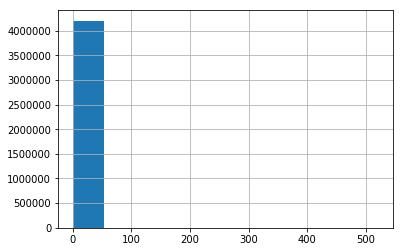

In [18]:
Ratings['num of ratings'].hist()

In [19]:
prd_ratings = pd.DataFrame(data.groupby('productId')['ratings'].mean())  
  
prd_ratings['num of ratings'] = pd.DataFrame(data.groupby('productId')['ratings'].count()) 
  
prd_ratings.head(20) 


,ratings,num of ratings
productId,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1
059400232X,5.000000,3
0594012015,2.000000,8
0594017343,1.000000,1
0594017580,3.000000,1


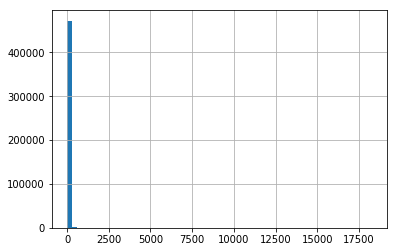

In [20]:
prd_ratings['num of ratings'].hist(bins=60)

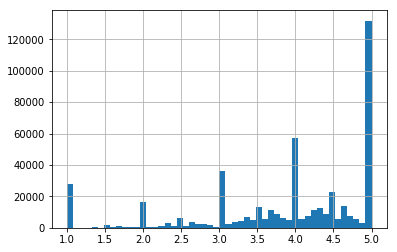

In [21]:
prd_ratings['ratings'].hist(bins=50)

### most products are rated between 3-5

In [22]:
Users_50.reset_index()

,userID,ratings,num of ratings
0,A100UD67AHFODS,4.508621,116
1,A100WO06OQR8BQ,3.651515,132
2,A105S56ODHGJEK,3.838235,68
3,A105TOJ6LTVMBG,3.845070,71
4,A10AFVU66A79Y1,4.184615,65
...,...,...,...
1535,AZBXKUH4AIW3X,3.849057,53
1536,AZCE11PSTCH1L,4.400000,60
1537,AZMY6E8B52L2T,4.714286,189
1538,AZNUHQSHZHSUE,4.222222,54


In [23]:
#consider only those users who have rated more than  50 products.
data_matrix = data[data.userID.isin(Users_50.index)]

In [24]:
data_matrix.head()

,userID,productId,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [25]:
#products which are rated more than 50 times
product_50 = prd_ratings[prd_ratings['num of ratings']>= 50 ]
data_prd_matrix = data[data.productId.isin(product_50.index)]

In [26]:
data_prd_matrix.head()

,userID,productId,ratings
182,A1BKC6B7YHYTVV,0972683275,4.0
183,AWVFSIB42LHKJ,0972683275,4.0
184,A36MQBNADRH8YY,0972683275,5.0
185,A3SRXMPLAEZ6DP,0972683275,4.0
186,A20XXTXWF2TCPY,0972683275,5.0


In [27]:
#those products and users who have given or recieved more than 50 ratings
final_data = pd.merge(data_matrix, data_prd_matrix, how='inner')
print(final_data)

               userID   productId  ratings
0      A3CLWR1UUZT6TG  0972683275      5.0
1      A3TAS1AG6FMBQW  0972683275      5.0
2      A2Y4H3PXB07WQI  0972683275      4.0
3      A25RTRAPQAJBDJ  0972683275      5.0
4      A3LDPF5FMB782Z  1400501466      5.0
...               ...         ...      ...
79177  A3R1WFO4KIUQXZ  B00L3YHF6O      5.0
79178  A3S3R88HA0HZG3  B00L3YHF6O      5.0
79179  A2XRMQA6PJ5ZJ8  B00L3YHF6O      5.0
79180  A3A4ZAIBQWKOZS  B00L3YHF6O      5.0
79181   AOVTLYTHVDNUX  B00L3YHF6O      5.0

[79182 rows x 3 columns]


In [28]:
final_data.shape

(79182, 3)

In [29]:
final_data.head(5)

,userID,productId,ratings
0,A3CLWR1UUZT6TG,0972683275,5.0
1,A3TAS1AG6FMBQW,0972683275,5.0
2,A2Y4H3PXB07WQI,0972683275,4.0
3,A25RTRAPQAJBDJ,0972683275,5.0
4,A3LDPF5FMB782Z,1400501466,5.0


In [30]:
final_data.groupby('productId').first()

,userID,ratings
productId,,
0972683275,A3CLWR1UUZT6TG,5.0
1400501466,A3LDPF5FMB782Z,5.0
1400501520,A3LDPF5FMB782Z,5.0
1400501776,A3LDPF5FMB782Z,5.0
1400532620,A1K4G5YJDJQI6Q,1.0
...,...,...
B00K91DB7Y,A2V9DTXTQ5YIMK,4.0
B00KFAGCUM,A4U27URFECK1U,5.0
B00KINSDK8,AWPODHOB4GFWL,5.0


In [31]:
# So we are considering 1540 users


### train test split

In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(final_data, test_size = 0.20, random_state=0)

In [33]:
train_data.dtypes

userID        object
productId     object
ratings      float64
dtype: object

### popularity based 

In [34]:

#Get a count of user_ids for each unique product as recommendation score
train_data_grouped = train_data.groupby('productId').agg({'userID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userID': 'score'},inplace=True)

In [35]:
train_data_grouped.dtypes

productId    object
score         int64
dtype: object

In [36]:
train_data_grouped.sample(5)

,productId,score
9689,B004LUSKQG,1
14581,B00BVUQZZ2,7
4075,B0012QN3AA,2
891,B0000C16R5,2
11233,B005MTMFHU,7


In [37]:
#Sort the songs based upon recommendation score
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1])


In [38]:
train_data_sort

,productId,score
12900,B0088CJT4U,162
7881,B003ES5ZUU,146
12668,B007WTAJTO,139
3061,B000N99BBC,132
12783,B00829TIEK,118
...,...,...
15661,B00JKCH4X0,1
15662,B00JLADOGW,1
15666,B00K0OBEE2,1
15668,B00K7O2DJU,1


In [39]:
 #Generate a recommendation rank based upon score
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
#Get the top 10 recommendations
popularity_recommendations = train_data_sort.head(10)

In [40]:
popularity_recommendations

,productId,score,Rank
12900,B0088CJT4U,162,1.0
7881,B003ES5ZUU,146,2.0
12668,B007WTAJTO,139,3.0
3061,B000N99BBC,132,4.0
12783,B00829TIEK,118,5.0
12779,B00829THK0,113,6.0
13018,B008DWCRQW,111,7.0
6825,B002R5AM7C,108,8.0
9265,B004CLYEDC,94,9.0
6912,B002SZEOLG,88,10.0


In [41]:
#these 10 are the most popular items and hence would be recommended to each user 
train_data.groupby('userID').first()

,productId,ratings
userID,,
A100UD67AHFODS,B004TLIVB6,5.0
A100WO06OQR8BQ,B002VFWY9M,1.0
A105S56ODHGJEK,B006I5MKZY,4.0
A105TOJ6LTVMBG,B00006JPRQ,5.0
A10AFVU66A79Y1,B002FL507A,4.0
...,...,...
AZBXKUH4AIW3X,B006K551HQ,4.0
AZCE11PSTCH1L,B004O0TREC,5.0
AZMY6E8B52L2T,B003B4AVRE,5.0


In [42]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_products_features = train_data.pivot(
    index='userID',
    columns='productId',
    values='ratings'
).fillna(0)
mat_product_features = csr_matrix(df_products_features.values)


In [43]:
df_products_features.shape

(1540, 15673)

In [44]:
#declaring k,metric as global which can be changed by the user later
global k,metric
k=4
metric='cosine' #can be changed to 'correlation' for Pearson correlation similaries

In [45]:

#get cosine similarities for ratings matrix M; pairwise_distances returns the distances between ratings and hence
#similarities are obtained by subtracting distances from 1
cosine_sim = 1-pairwise_distances(df_products_features, metric="cosine")

In [46]:

#Cosine similarity matrix
pd.DataFrame(cosine_sim)

,0,1,2,3,4,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539
0,1.000000,0.019005,0.000000,0.000000,0.019330,0.000000,0.020092,0.036972,0.000000,0.019920,...,0.000000,0.000000,0.000000,0.019015,0.013683,0.000000,0.000000,0.046150,0.028511,0.026660
1,0.019005,1.000000,0.000000,0.027386,0.016455,0.019155,0.000000,0.012589,0.007517,0.000000,...,0.000000,0.004987,0.026924,0.000000,0.022518,0.033694,0.000000,0.034919,0.000000,0.006052
2,0.000000,0.000000,1.000000,0.000000,0.040593,0.044301,0.000000,0.000000,0.024724,0.000000,...,0.000000,0.000000,0.027484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.027386,0.000000,1.000000,0.000000,0.000000,0.000000,0.005328,0.000000,0.000000,...,0.028333,0.000000,0.023575,0.000000,0.000000,0.034223,0.000000,0.036354,0.000000,0.000000
4,0.019330,0.016455,0.040593,0.000000,1.000000,0.038052,0.000000,0.000000,0.000000,0.022996,...,0.000000,0.000000,0.014165,0.034298,0.057260,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,0.000000,0.033694,0.000000,0.034223,0.000000,0.000000,0.000000,0.000000,0.032614,0.070631,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.027273,0.000000,0.000000
1536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014396,0.000000,0.000000,0.000000,...,0.029351,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.004593,0.000000,0.000000
1537,0.046150,0.034919,0.000000,0.036354,0.000000,0.000000,0.036178,0.016983,0.016900,0.032940,...,0.022579,0.000000,0.000000,0.000000,0.015713,0.027273,0.004593,1.000000,0.026192,0.024492
1538,0.028511,0.000000,0.000000,0.000000,0.000000,0.044899,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026192,1.000000,0.000000


In [47]:
#get pearson similarities for ratings matrix M
pearson_sim = 1-pairwise_distances(df_products_features, metric="correlation")

In [48]:

#Pearson correlation similarity matrix
pd.DataFrame(pearson_sim)

,0,1,2,3,4,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539
0,1.000000,0.015004,-0.002737,-0.003073,0.016239,-0.002670,0.016492,0.033521,-0.004269,0.016537,...,-0.003092,-0.002846,-0.003772,0.016233,0.009448,-0.002512,-0.002808,0.041861,0.026044,0.024184
1,0.015004,1.000000,-0.002724,0.024414,0.013368,0.016553,-0.003657,0.009066,0.003299,-0.003436,...,-0.003077,0.002170,0.023271,-0.002826,0.018340,0.031288,-0.002795,0.030600,-0.002536,0.003529
2,-0.002737,-0.002724,1.000000,-0.002053,0.038572,0.042597,-0.002454,-0.002394,0.021950,-0.002306,...,-0.002065,-0.001901,0.025038,-0.001896,-0.002868,-0.001678,-0.001875,-0.003004,-0.001702,-0.001704
3,-0.003073,0.024414,-0.002053,1.000000,-0.002366,-0.002003,-0.002756,0.002653,-0.003202,-0.002590,...,0.026080,-0.002135,0.020813,-0.002130,-0.003221,0.032404,-0.002106,0.033113,-0.001911,-0.001914
4,0.016239,0.013368,0.038572,-0.002366,1.000000,0.036076,-0.002828,-0.002760,-0.003287,0.020399,...,-0.002380,-0.002191,0.011302,0.032188,0.054152,-0.001934,-0.002162,-0.003462,-0.001962,-0.001964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,-0.002512,0.031288,-0.001678,0.032404,-0.001934,-0.001637,-0.002252,-0.002198,0.030095,0.068672,...,-0.001896,-0.001745,-0.002313,-0.001741,-0.002633,1.000000,-0.001721,0.024604,-0.001562,-0.001564
1536,-0.002808,-0.002795,-0.001875,-0.002106,-0.002162,-0.001829,0.011917,-0.002456,-0.002925,-0.002366,...,0.027295,-0.001950,-0.002585,-0.001945,-0.002943,-0.001721,1.000000,0.001527,-0.001746,-0.001748
1537,0.041861,0.030600,-0.003004,0.033113,-0.003462,-0.002930,0.032295,0.013117,0.012294,0.029280,...,0.019268,-0.003123,-0.004140,-0.003116,0.011074,0.024604,0.001527,1.000000,0.023481,0.021772
1538,0.026044,-0.002536,-0.001702,-0.001911,-0.001962,0.043314,-0.002285,-0.002229,-0.002655,-0.002147,...,-0.001923,-0.001770,-0.002346,-0.001765,-0.002670,-0.001562,-0.001746,0.023481,1.000000,-0.001586


In [49]:
#Note that the similarities are same as obtained via using pairwise_distances
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.loc[user_id, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    print (k,user_id)
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;

        else:
            print (i, indices.flatten()[i]+1, similarities.flatten()[i])
            
    return similarities,indices

In [50]:
df_products_features.index

Index(['A100UD67AHFODS', 'A100WO06OQR8BQ', 'A105S56ODHGJEK', 'A105TOJ6LTVMBG',
       'A10AFVU66A79Y1', 'A10H24TDLK2VDP', 'A10NMELR4KX0J6', 'A10O7THJ2O20AG',
       'A10PEXB6XAQ5XF', 'A10X9ME6R66JDX',
       ...
       'AYOTEJ617O60K', 'AYP0YPLSP9ISM', 'AZ515FFZ7I2P7', 'AZ8XSDMIX04VJ',
       'AZAC8O310IK4E', 'AZBXKUH4AIW3X', 'AZCE11PSTCH1L', 'AZMY6E8B52L2T',
       'AZNUHQSHZHSUE', 'AZOK5STV85FBJ'],
      dtype='object', name='userID', length=1540)

In [51]:
#df_products_features
similarities,indices = findksimilarusers( 'A10X9ME6R66JDX',df_products_features, metric='cosine')

4 A10X9ME6R66JDX
0 10 1.0
1 402 0.13135980198551023
2 1230 0.10634745068466023
3 1528 0.10028644432544342
4 321 0.09113129033797407


In [52]:
# user --- 10,402,1230,1528 ... we can suggest them the same product with productId - 'A10X9ME6R66JDX'

In [53]:
#df_products_features
similarities,indices = findksimilarusers( 'AZCE11PSTCH1L',df_products_features, metric='cosine')

4 AZCE11PSTCH1L
0 1537 0.9999999999999999
1 720 0.12058037943304245
2 1166 0.08881821332442996
3 1412 0.08805362337383671
4 1082 0.0873530701356916


In [59]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

In [60]:
final_data.head()

,userID,productId,ratings
0,A3CLWR1UUZT6TG,0972683275,5.0
1,A3TAS1AG6FMBQW,0972683275,5.0
2,A2Y4H3PXB07WQI,0972683275,4.0
3,A25RTRAPQAJBDJ,0972683275,5.0
4,A3LDPF5FMB782Z,1400501466,5.0


In [61]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))
surprisedata = Dataset.load_from_df(final_data[['userID', 'productId', 'ratings']], reader)

In [62]:
surprisedata

In [63]:
trainset, testset = train_test_split(surprisedata, test_size=.15)

In [64]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [65]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [66]:
test_pred

[Prediction(uid='A2294LS59GC5K7', iid='B006G5ZVA2', r_ui=4.0, est=4.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1FDSZISWIXH1A', iid='B004SBBD8U', r_ui=5.0, est=5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A1BT6TL7UCIC5Y', iid='B007RB164E', r_ui=4.0, est=3.6663733163624053, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A38NELQT98S4H8', iid='B006BUN5YQ', r_ui=4.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABAPF3XY1W6JX', iid='B000Z80ICM', r_ui=5.0, est=4.296296296296297, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3R19YKNL641X3', iid='B00BSED7S4', r_ui=5.0, est=3.875, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A17BUUBOU0598B', iid='B004P0MVHG', r_ui=4.0, est=3.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AR3EVUQF0AC7R', iid='B0049U3TVE', r_ui=3.0, est=3.114536295414136, details={'actual_k': 5, 'was_imposs

In [67]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.1178


1.1177881588052478

In [68]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(surprisedata):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9578
RMSE: 0.9659
RMSE: 0.9583


In [69]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(surprisedata)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9631995049335823
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [70]:
algo = gs.best_estimator['rmse']
algo.fit(surprisedata.build_full_trainset())

In [71]:
predictions = algo.test(testset)
# Compute and print Root Mean Squared Error
accuracy.rmse(predictions, verbose=True)

RMSE: 0.8754


0.875391252434857

In [72]:
predictions

[Prediction(uid='A3R33KMESG0XGQ', iid='B0058D8D3K', r_ui=4.0, est=4.084277064066692, details={'was_impossible': False}),
 Prediction(uid='AKCZIJ6ZHE41D', iid='B0012JCYPC', r_ui=4.0, est=3.8533018106981882, details={'was_impossible': False}),
 Prediction(uid='ASHJAZC9OA9NS', iid='B001IEZX3G', r_ui=5.0, est=4.765530260822483, details={'was_impossible': False}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B000BQ7GW8', r_ui=5.0, est=4.80492958507607, details={'was_impossible': False}),
 Prediction(uid='A6VPK7X53QNAQ', iid='B0002OCF0C', r_ui=4.0, est=4.027396633316048, details={'was_impossible': False}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B000MX48VM', r_ui=4.0, est=4.748332192538015, details={'was_impossible': False}),
 Prediction(uid='A2I357I10ZY7CI', iid='B0002E1TWC', r_ui=5.0, est=4.240797713073815, details={'was_impossible': False}),
 Prediction(uid='AONUCJBC85BL', iid='B008TO3X4Y', r_ui=3.0, est=3.961014738413768, details={'was_impossible': False}),
 Prediction(uid='A335QXPTV1RIV1', iid

In [74]:
from sklearn.externals import joblib
import Recommenders as Recommenders


In [75]:
train_data.columns

Index(['userID', 'productId', 'ratings'], dtype='object')

In [76]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userID', 'productId')

In [77]:
test_data.head()

,userID,productId,ratings
66414,AWH2AY17ZU7W2,B009A6CZ30,5.0
10577,A1SHHQSPOWR00F,B000HGIWN4,3.0
41940,A1PVJICI412IN4,B00466X9SY,5.0
76441,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
30035,AMKNPIDFLRFMP,B002O3W2OI,2.0


In [78]:
#Print the movies for the user in training data
user_id = 'AGYH5U11ZKPFB'
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data movies for the user userid: AGYH5U11ZKPFB:
------------------------------------------------------------------------------------
B000NH7SZ0
B000062VUO
B004P20FTU
B008JJLW4M
B000BMZHX2
B00757KJTI
B006VCP72W
B004LTEUDO
B0000AZK4G
B007JLE84C
B003P2UMQ2
B0046BGUWG
B001FVI91U
B000OGA81Q
B003VAGXWK
B003FVVMS0
B0041ORN6U
B004UC4HCG
B00HOJAVDG
B0064XAIZY
B000OL22T2
B004YDUZ22
B000OG4E2U
B006X2HD2M
B005X64OA8
B003KP8VSK
B000OG88KY
B00752VKTG
B007YWMCA8
B006U3O566
B0091F8F7A
B0027VT6OG
B002MZUNXU
B003X7TRWE
B0012MMW7E
B005KSAG3S
B001TK89L2
B0002GX0ZE
B008BDBPT8
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 39
no. of unique songs in the training set: 15673
Non zero values in cooccurence_matrix :12581


,userId,movieId,score,rank
0,AGYH5U11ZKPFB,B000BK393Y,0.024918,1
1,AGYH5U11ZKPFB,B004TZVKIS,0.024918,2
2,AGYH5U11ZKPFB,B004U4WYLU,0.024918,3
3,AGYH5U11ZKPFB,B001U3Y8MW,0.024918,4
4,AGYH5U11ZKPFB,B0035PS55O,0.024918,5
5,AGYH5U11ZKPFB,B001OZFCI0,0.024918,6
6,AGYH5U11ZKPFB,B000ALM3RC,0.024918,7
7,AGYH5U11ZKPFB,B00D0B7HIE,0.024918,8
8,AGYH5U11ZKPFB,B00FY6DV3S,0.024918,9
9,AGYH5U11ZKPFB,B0024UEVUO,0.024918,10


In [79]:
# these are the 10 products to be recommended to the user.

### Observations 

most products in the dataset were rated between 3-5
Content-based approach requires a good amount of information of items’ own features, rather than using users’ interactions and feedbacks, but here we did not have much content , hence we did not use the content based- approach 

 In Collaborative filtering, the model learns from the user’s past behavior, user’s decision, preference to predict items the user might have an interest in.
 
 In surprise we have a wide choice of algorithms to use and a wide choice of parameters to tune for each algorithm. From the famous available algorithms I mention SVD, NMF, KNN. For the purpose of our test I have used the SVD algorithm. 
 
 
Surprise also supports the RMSE and MAE measurements so we I have used those to measure the performance of our algorithm.


For recommending products I have used : 
an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user.